In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the data file**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Analysis/Back End/Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

# **Exploratory Data Analysis (EDA) & Data Visualization**


**lmplot:** Seaborn's lmplot is used to create scatter plots with linear regression lines, making it useful for visualizing the relationship between two numeric variables and assessing their linear correlation.

**kdeplot:** The kdeplot function in Seaborn creates Kernel Density Estimation plots, displaying the smoothed distribution of a single numeric variable. It's ideal for understanding the data's underlying probability density.

**countplot:** Seaborn's countplot is designed for categorical data, displaying the count of occurrences of each category. It's helpful for visualizing the frequency distribution of categorical variables.

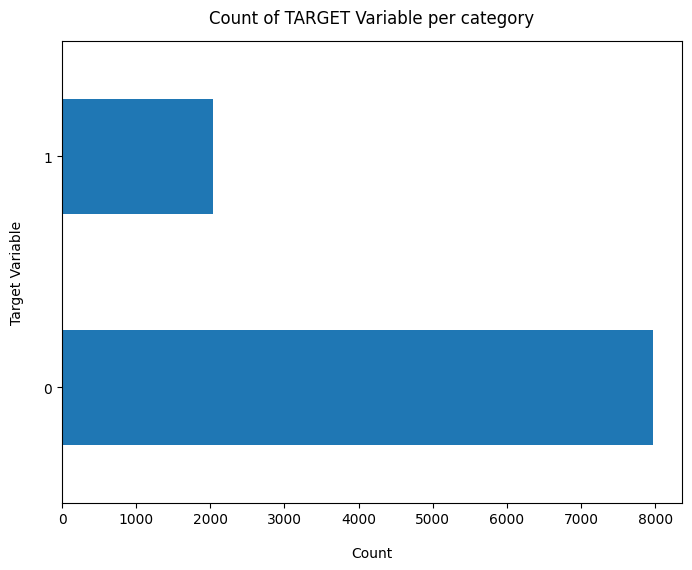

In [8]:
data['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

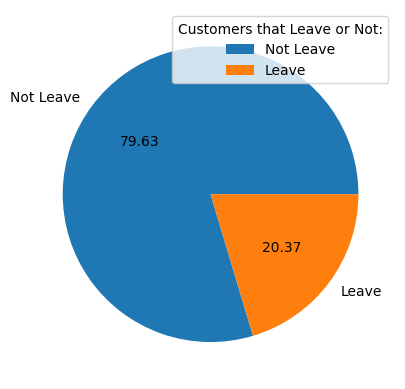

In [9]:
plt.pie(data['Exited'].value_counts(), labels = ['Not Leave', 'Leave'], autopct = '%0.2f')
plt.legend(title = 'Customers that Leave or Not:', loc='upper right')
plt.show()

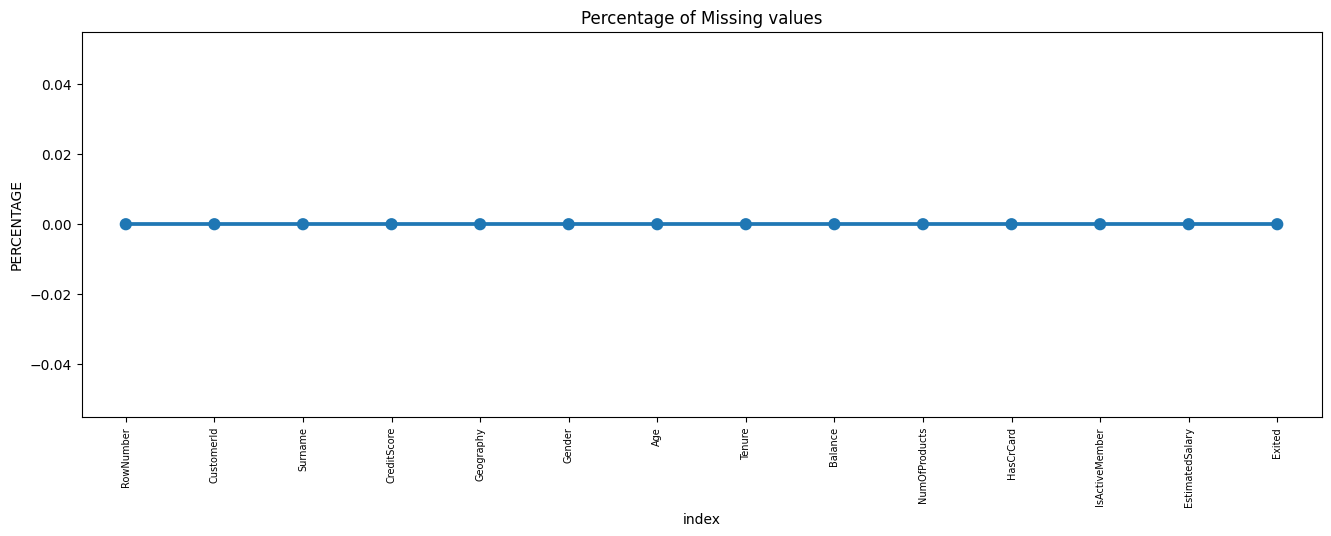

In [10]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x = 'index',y = 0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Univariate Analysis**

In [11]:
# numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# # Convert numeric columns to categorical
# for column in numeric_columns:
#     data[column] = data[column].astype('category')

# for i, predictor in enumerate(data):
#     plt.figure(i)
#     sns.countplot(data = data, x = predictor, hue = 'Exited')
#     plt.title(f'Count Plot for {predictor}')
#     plt.xlabel(predictor)
#     plt.ylabel('Count')
#     plt.legend(title='Exited', labels=['No', 'Yes'])
#     plt.tight_layout()
#     plt.show()

# **Data Cleaning & Data Pre-Processing**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
data.duplicated().sum()

0

In [14]:
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [15]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
data['Exited'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [18]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


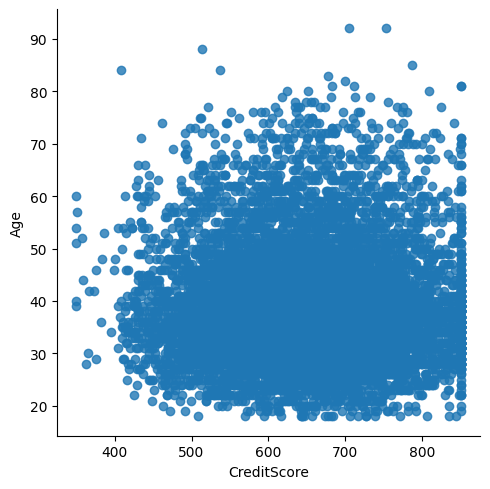

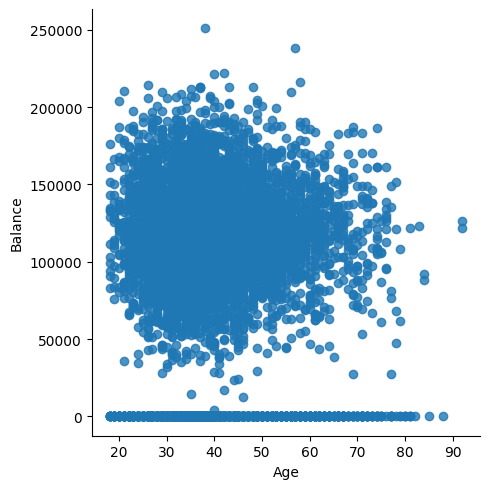

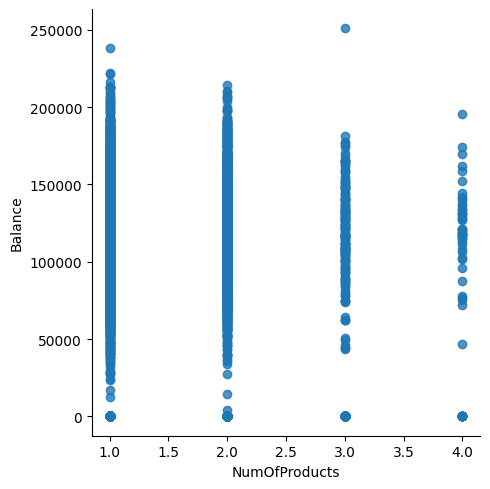

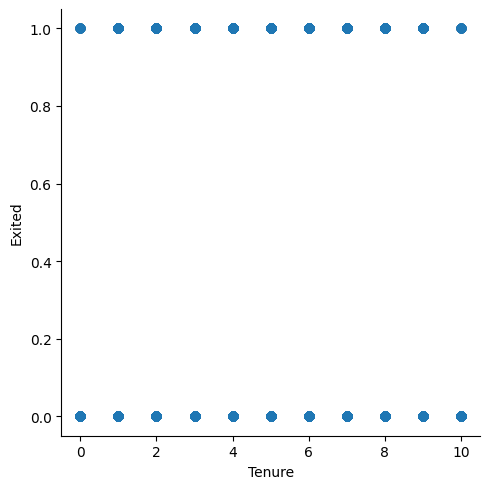

In [22]:
print(sns.lmplot(data = data, x='CreditScore', y='Age', fit_reg=False))
print(sns.lmplot(data = data, x='Age', y='Balance', fit_reg=False))
print(sns.lmplot(data = data, x='NumOfProducts', y='Balance', fit_reg=False))
print(sns.lmplot(data = data, x='Tenure', y='Exited', fit_reg=False))

Axes(0.125,0.11;0.775x0.77)


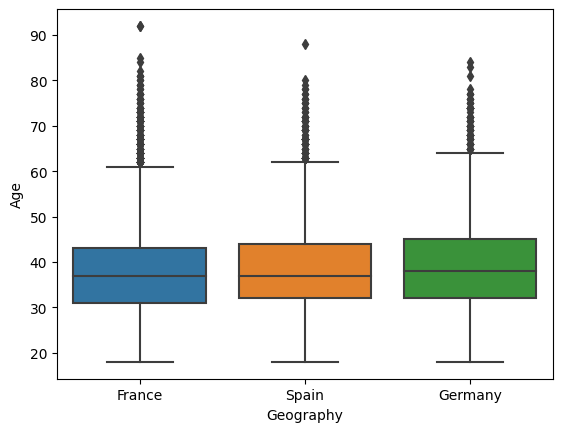

In [23]:
print(sns.boxplot(data = data, x='Geography', y='Age'))

Axes(0.125,0.11;0.775x0.77)


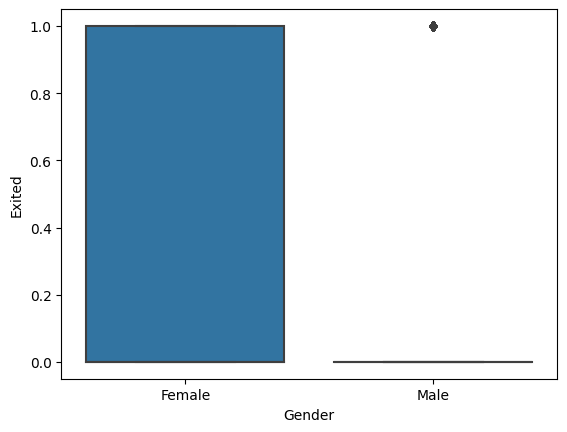

In [24]:
print(sns.boxplot(data = data, x='Gender', y='Exited'))

In [25]:
data = pd.get_dummies(data, columns = ['Geography','Gender'], drop_first = True)

In [26]:
# Now We have all Numerical Data
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<ipython-input-27-0f2e0b2564fc>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
<ipython-input-27-0f2e0b2564fc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],


Text(0.5, 1.0, 'Extimated Salary by Churn')

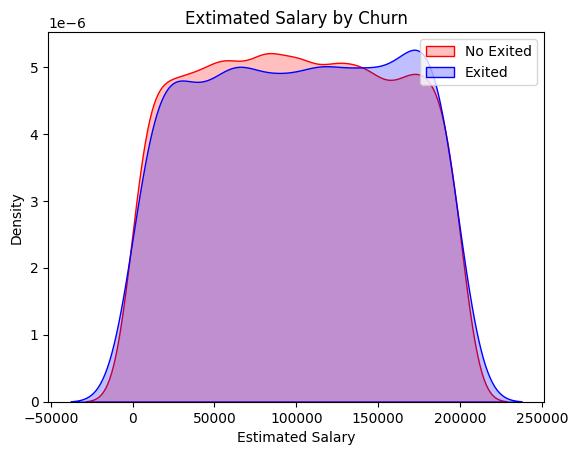

In [27]:
Mth = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Exited","Exited"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Estimated Salary')
Mth.set_title('Extimated Salary by Churn')

<ipython-input-28-e37044ec7f4a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data.Balance[(data["Exited"] == 0) ],
<ipython-input-28-e37044ec7f4a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data.Balance[(data["Exited"] == 1) ],


Text(0.5, 1.0, 'Total Balance by Churn')

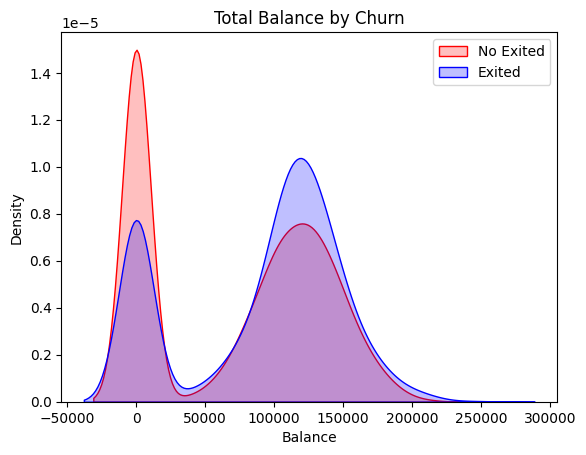

In [28]:
Tot = sns.kdeplot(data.Balance[(data["Exited"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data.Balance[(data["Exited"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Exited","Exited"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Total Balance by Churn')

<Axes: >

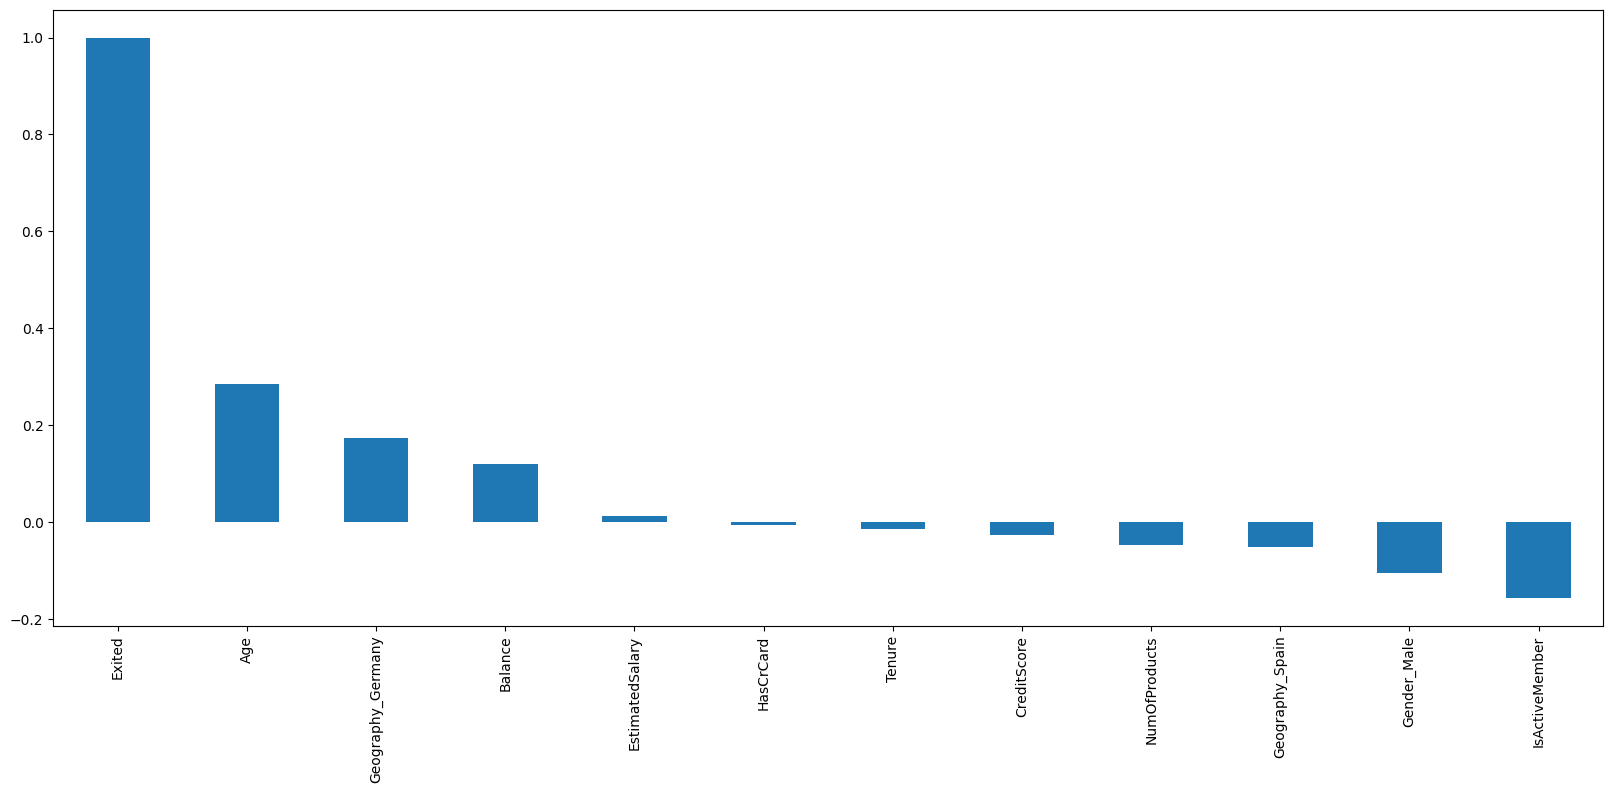

In [29]:
plt.figure(figsize=(20,8))
data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

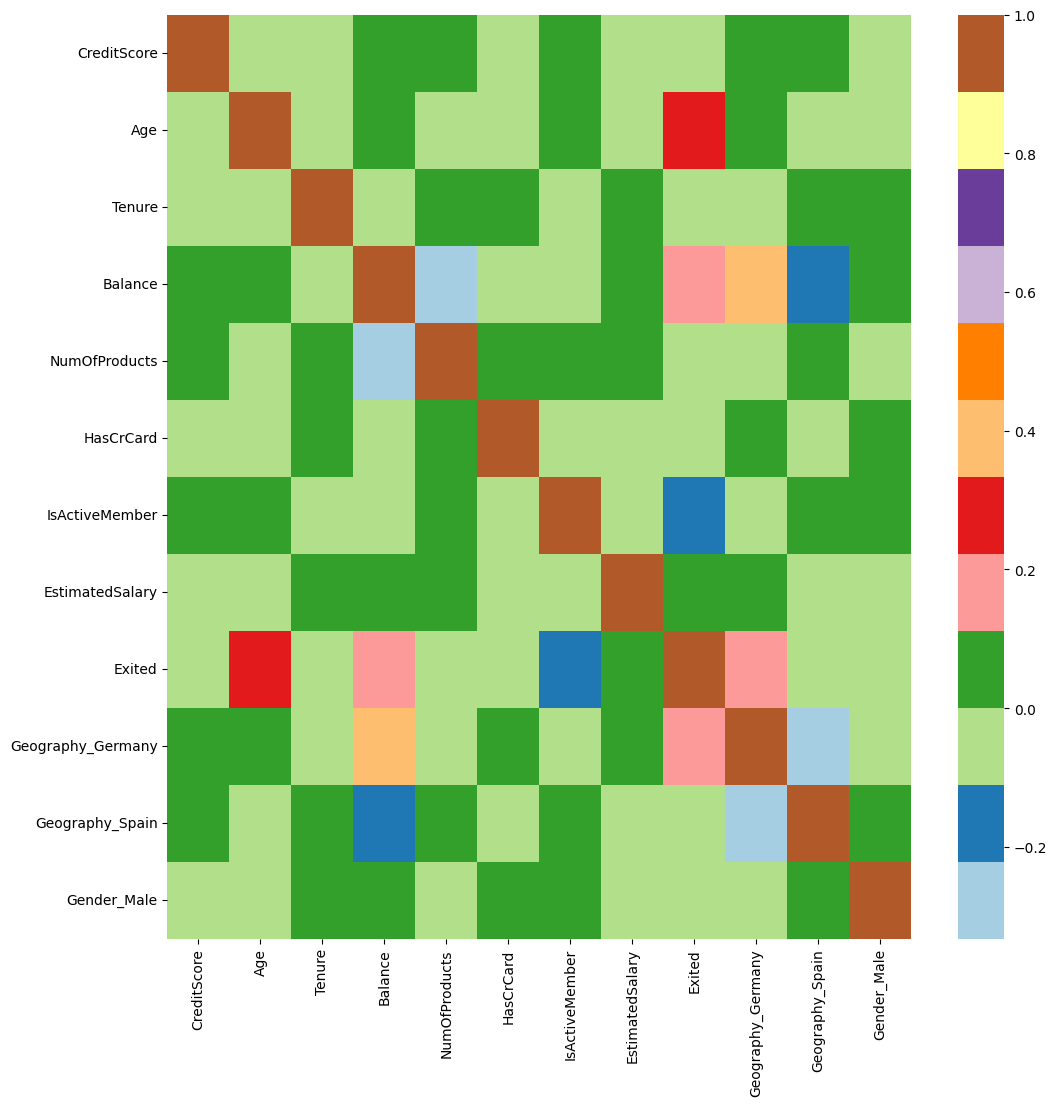

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="Paired")

**Bivariate Analysis**

In [31]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Convert numeric columns to categorical
for column in numeric_columns:
    data[column] = data[column].astype('category')
    new_df1_target0=data.loc[data["Exited"]==0]
    new_df1_target1=data.loc[data["Exited"]==1]

In [32]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

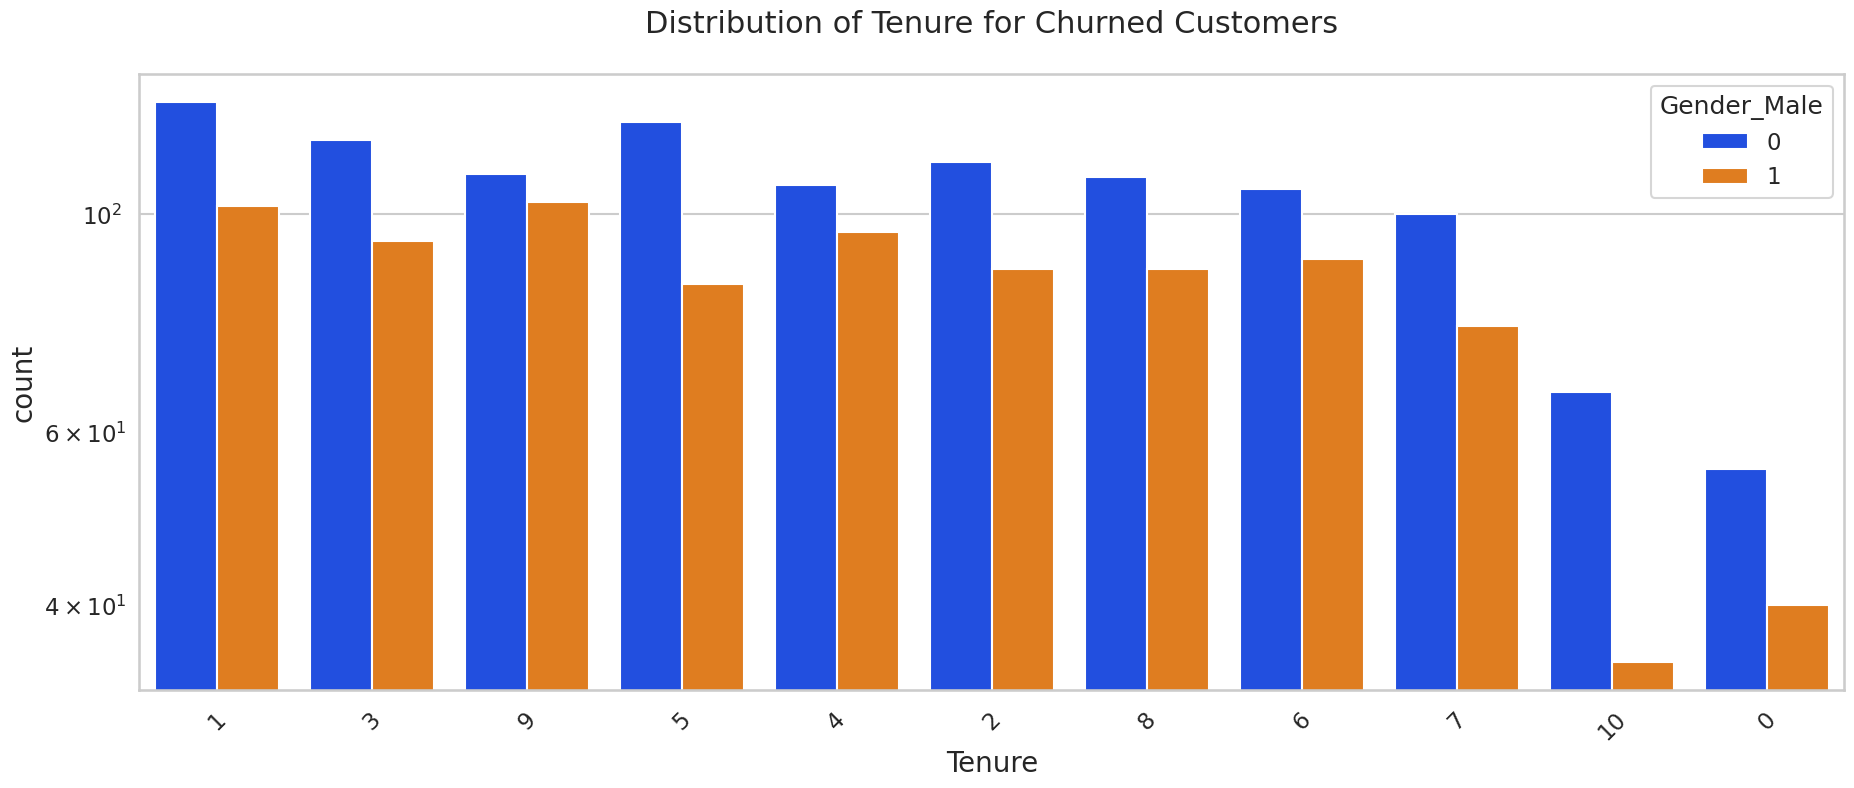

In [33]:
uniplot(new_df1_target1,col='Tenure',title='Distribution of Tenure for Churned Customers',hue='Gender_Male')

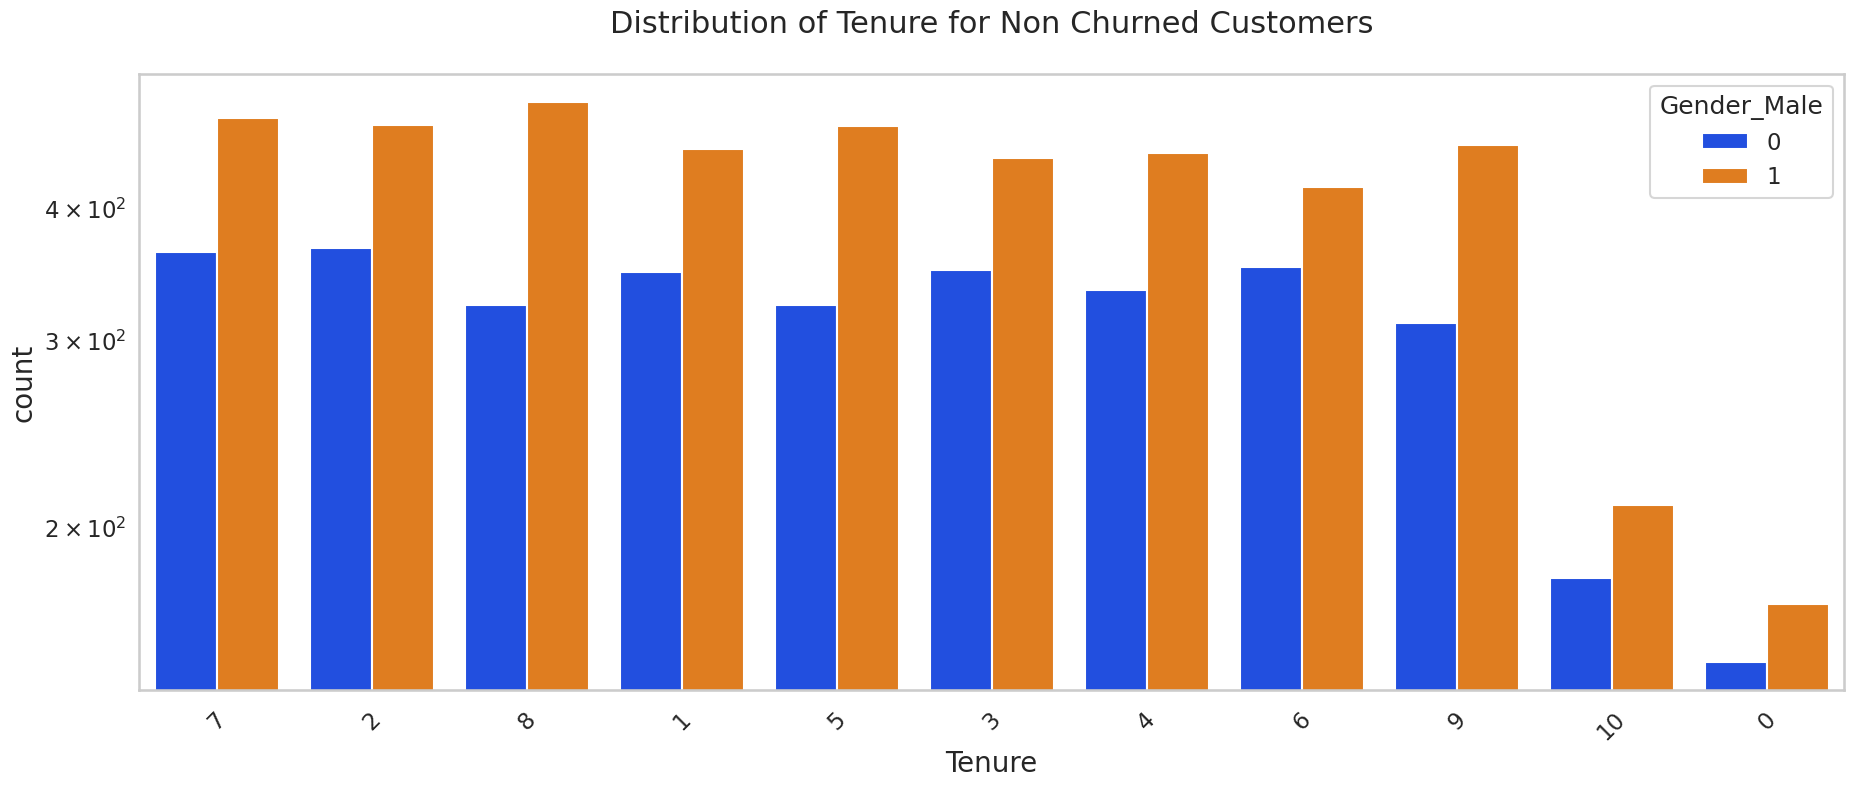

In [34]:
uniplot(new_df1_target0,col='Tenure',title='Distribution of Tenure for Non Churned Customers',hue='Gender_Male')

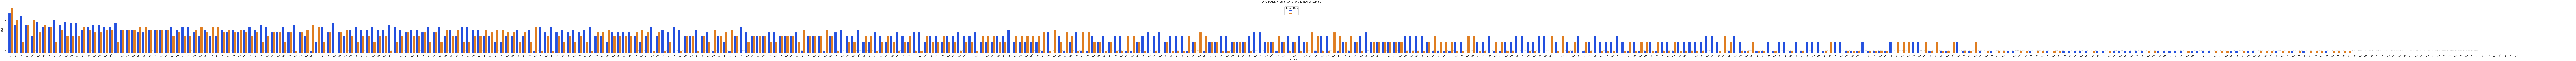

In [35]:
uniplot(new_df1_target1,col='CreditScore',title='Distribution of CreditScore for Churned Customers',hue='Gender_Male')

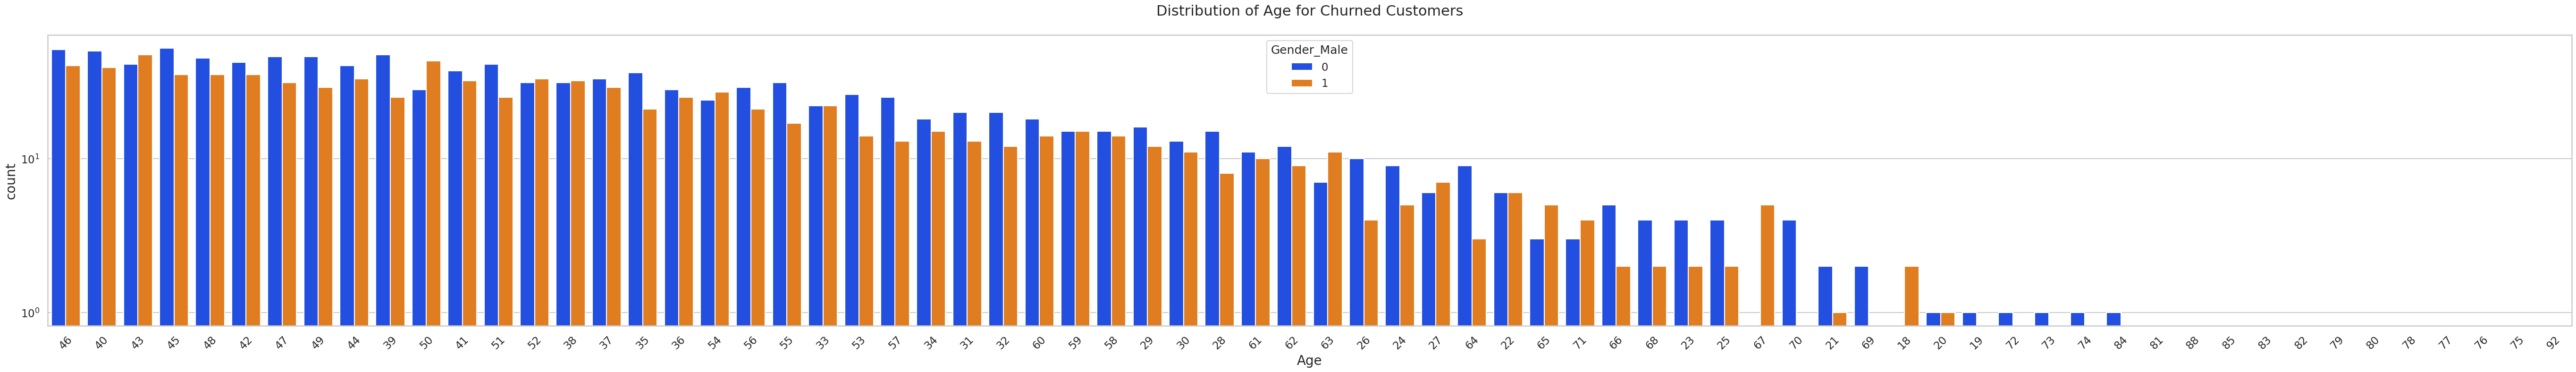

In [36]:
uniplot(new_df1_target1,col='Age',title='Distribution of Age for Churned Customers',hue='Gender_Male')

**Conclusion**

In [37]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Analysis/Back End/Churn_Modelling1.csv')

#**Model Building**

In [38]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Churn Analysis/Back End/Churn_Modelling1.csv")
df.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [39]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [41]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [44]:
X_train.shape

(8000, 11)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_Train_Scaled = scaler.fit_transform(X_train)
X_Test_Scaled = scaler.transform(X_test)

**ANN**

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [50]:
history = model.fit(X_Train_Scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 6s 4ms/step - loss: 0.4934 - accuracy: 0.7950 - val_loss: 0.4562 - val_accuracy: 0.8062
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.8089 - val_loss: 0.4328 - val_accuracy: 0.8144
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8186 - val_loss: 0.4200 - val_accuracy: 0.8206
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4145 - accuracy: 0.8238 - val_loss: 0.4095 - val_accuracy: 0.8256
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4029 - accuracy: 0.8300 - val_loss: 0.3952 - val_accuracy: 0.8319
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3888 - accuracy: 0.8422 - val_loss: 0.3810 - val_accuracy: 0.8431
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3763 - accuracy: 0.8459 - val_loss: 0.3700 - val_accuracy: 0.8506

In [51]:
print(model.layers[0].get_weights())
print('====='*50)
print(model.layers[1].get_weights())
print('====='*50)
print(model.layers[2].get_weights())

[array([[ 0.4766333 ,  0.04060309,  0.03751038, -0.228255  ,  0.37036547,
        -0.3700889 , -0.02553741, -0.37238678, -0.0390973 ,  0.19848208,
         0.10682048],
       [ 0.40994412,  0.09249036, -0.48863736,  0.91668457, -0.20325586,
        -0.35289747,  0.38209578, -0.77510947,  0.19126539, -0.55232036,
         1.0647086 ],
       [ 0.22226061, -0.34973738,  0.18758136, -0.10855644,  0.42436138,
         0.7321631 ,  0.7313293 , -0.13270378,  0.00349477, -0.18652421,
        -0.16164967],
       [ 0.05323711, -0.26755258, -0.09810068, -0.30052155,  0.14972243,
        -0.16980599,  0.46115828,  0.2253156 ,  0.33905905, -0.0468129 ,
        -0.2381099 ],
       [-0.28192392,  0.5185639 , -0.8213173 , -0.7129236 , -0.06243686,
         0.17275174, -0.35847318,  0.14849298,  1.0727929 , -0.00598341,
         0.54953647],
       [ 0.2760682 ,  0.46938372, -0.08820037, -0.02055063, -0.200004  ,
         0.40061674,  0.48905212, -0.38025868,  0.03439393, -0.08222991,
         0.20

In [52]:
y_log = model.predict(X_Test_Scaled)

63/63 [==============================] - 0s 2ms/step


In [53]:
y_pred = np.where(y_log>0.5, 1, 0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

In [55]:
import matplotlib.pyplot as plt

In [56]:
history.history

{'loss': [0.493383526802063,
  0.44121795892715454,
  0.4248400032520294,
  0.41449642181396484,
  0.40292975306510925,
  0.38882309198379517,
  0.37627604603767395,
  0.3657601475715637,
  0.35959380865097046,
  0.35469383001327515,
  0.35116755962371826,
  0.3488914370536804,
  0.3465953767299652,
  0.3455260097980499,
  0.34418728947639465,
  0.3429071009159088,
  0.34153488278388977,
  0.34190163016319275,
  0.3410412073135376,
  0.3403520882129669,
  0.33989158272743225,
  0.3395955562591553,
  0.33889979124069214,
  0.3391488194465637,
  0.3379327356815338,
  0.3375820815563202,
  0.33742958307266235,
  0.3379230797290802,
  0.3364564776420593,
  0.3361600935459137,
  0.33567947149276733,
  0.3355599343776703,
  0.33593860268592834,
  0.33481234312057495,
  0.33466362953186035,
  0.3349056541919708,
  0.334528386592865,
  0.33397337794303894,
  0.3341006934642792,
  0.33306336402893066,
  0.3332260549068451,
  0.3328273296356201,
  0.3331539034843445,
  0.3324366807937622,
  0.33

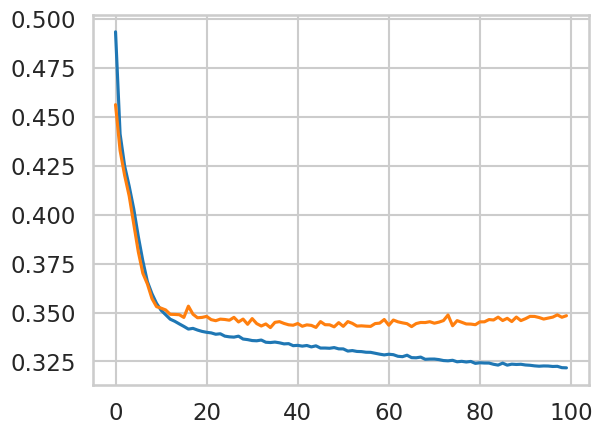

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

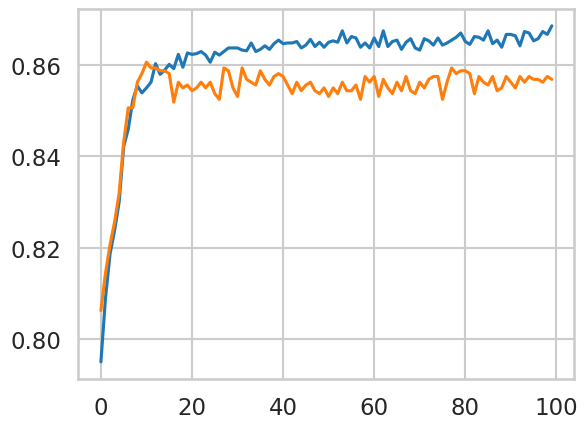

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# **Use of Some Other Classifiers**

**Decision Tree Classifier**

In [59]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [60]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [61]:
model_dt.fit(X_Train_Scaled,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
y_pred=model_dt.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [63]:
model_dt.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.7925

In [64]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**After Resampling Decision Tree Classifier**

In [65]:
!pip install --upgrade imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [66]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [67]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [68]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [69]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [70]:
yr_predict = model_dt_smote.predict(xr_test)

In [71]:
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8137931034482758
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       597
           1       0.81      0.85      0.83       708

    accuracy                           0.81      1305
   macro avg       0.81      0.81      0.81      1305
weighted avg       0.81      0.81      0.81      1305



In [72]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[458 139]
 [104 604]]


**Random Forest Classifer**

In [73]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [74]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [75]:
y_pred=model_rf.predict(X_test)

In [76]:
model_rf.score(X_test,y_test)


0.8615

In [77]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.87      0.39      0.54       415

    accuracy                           0.86      2000
   macro avg       0.87      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



**After Resampling Random Forest Classifier**

In [78]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [79]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [80]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [81]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [82]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [83]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [84]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.8311787072243346
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       578
           1       0.83      0.88      0.85       737

    accuracy                           0.83      1315
   macro avg       0.83      0.82      0.83      1315
weighted avg       0.83      0.83      0.83      1315



In [85]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[443 135]
 [ 87 650]]


In [86]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [87]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [88]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [89]:
yr_predict_pca = model.predict(xr_test_pca)

In [90]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [91]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7330798479087453
              precision    recall  f1-score   support

           0       0.78      0.55      0.64       578
           1       0.71      0.88      0.79       737

    accuracy                           0.73      1315
   macro avg       0.75      0.71      0.72      1315
weighted avg       0.74      0.73      0.72      1315



In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [94]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [95]:
def train_classifier(clf, X_train, y_trian, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  # confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [96]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7925, 0.0)

In [97]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.7925
Precision -  0.0
For  KN
Accuracy -  0.764
Precision -  0.291970802919708
For  NB
Accuracy -  0.5455
Precision -  0.23890063424947147
For  DT
Accuracy -  0.854
Precision -  0.711340206185567
For  LR
Accuracy -  0.8115
Precision -  0.6338028169014085
For  RF
Accuracy -  0.8595
Precision -  0.7887931034482759
For  AdaBoost
Accuracy -  0.8585
Precision -  0.7578125
For  BgC
Accuracy -  0.854
Precision -  0.7252747252747253
For  ETC
Accuracy -  0.8555
Precision -  0.771551724137931
For  GBDT
Accuracy -  0.8615
Precision -  0.8108108108108109
For  xgb
Accuracy -  0.8625
Precision -  0.7592592592592593


In [98]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [99]:
performance_df

,Algorithm,Accuracy,Precision
9,GBDT,0.8615,0.810811
5,RF,0.8595,0.788793
8,ETC,0.8555,0.771552
10,xgb,0.8625,0.759259
6,AdaBoost,0.8585,0.757812
7,BgC,0.8540,0.725275
3,DT,0.8540,0.711340
4,LR,0.8115,0.633803
1,KN,0.7640,0.291971
2,NB,0.5455,0.238901


# **Pickling the Model**

In [100]:
import pickle

In [101]:
filename = 'model.sav'

In [102]:
pickle.dump(model_rf, open(filename, 'wb'))

In [103]:
load_model = pickle.load(open(filename, 'rb'))

In [104]:
model_score = load_model.score(X_test,y_test)

In [105]:
model_score

0.8615